In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/ml project.csv.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.00,C1034382650,142758.39,281410.24,0.0,0.0


In [ ]:
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          28297 non-null  float64
 1   oldbalanceOrg   28297 non-null  float64
 2   newbalanceOrig  28297 non-null  float64
 3   oldbalanceDest  28297 non-null  float64
 4   newbalanceDest  28297 non-null  float64
 5   isFraud         28296 non-null  float64
 6   isFlaggedFraud  28296 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


In [ ]:
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df['isFraud'].value_counts()

isFraud
0.0    28212
1.0       84
Name: count, dtype: int64

In [ ]:
X = df.drop('isFraud',axis=1)

y = df['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd

# Check for NaN values in the dataset
print(X_train.isnull().sum())


amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    1
dtype: int64


In [ ]:
# Drop rows where 'isFlaggedFraud' is NaN
X_train_cleaned = X_train[y_train.notna()]
y_train_cleaned = y_train[y_train.notna()]


In [ ]:
classifier.fit(X_train_cleaned, y_train_cleaned)


LogisticRegression(solver='liblinear')

In [ ]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train_cleaned, y_train_cleaned)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(X_train.isnull().sum())


amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    1
dtype: int64


In [ ]:
# Combine the indices from y_train and X_train
valid_indices = y_train.notna() & X_train.notna().all(axis=1)

# Filter both X_train and y_train
X_train_cleaned = X_train[valid_indices]
y_train_cleaned = y_train[valid_indices]


In [ ]:
# Remove the 'isFlaggedFraud' column from the DataFrame
df = df.drop('isFlaggedFraud', axis=1)

# Check the updated DataFrame
print(df.head())


     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   isFraud  
0      0.0  
1      0.0  
2      1.0  
3      1.0  
4      0.0  


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train_cleaned,y_train_cleaned)

LogisticRegression(solver='liblinear')

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
1958,0.0,0.0
18019,0.0,0.0
15448,0.0,0.0
22000,0.0,0.0
12964,0.0,0.0
3806,0.0,0.0
24228,0.0,0.0
6445,0.0,0.0
17402,0.0,0.0
4766,0.0,0.0


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9879858657243816


In [ ]:
y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(X_train.isnull().sum())


amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    1
dtype: int64


In [ ]:
# Drop rows with missing values
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

classifier.fit(X_train_cleaned, y_train_cleaned)


LogisticRegression(solver='liblinear')

In [ ]:
y_train_pred = classifier.predict(X_train_cleaned)

print(accuracy_score(y_train_cleaned,y_train_pred))

0.9849540543269716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)

(8490, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_test_proba[0:5,:]

array([[1.00000000e+00, 8.47184329e-80],
       [9.99999994e-01, 6.02752376e-09],
       [1.00000000e+00, 4.61549446e-25],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.21895675e-16]])

In [ ]:
import numpy as np

array_in_scientific = y_test_proba[0:5,:]

array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['1.0000000000000000' '0.0000000000000000']
 ['0.9999999939724762' '0.0000000060275238']
 ['1.0000000000000000' '0.0000000000000000']
 ['1.0000000000000000' '0.0000000000000000']
 ['0.9999999999999994' '0.0000000000000005']]


In [ ]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0000000000000000' '0.0000000060275238' '0.0000000000000000' ...
 '0.0753695133090799' '0.0000049006982515' '0.0000890794591981']


In [ ]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
1958,0.0,0.0,0.0000000000000000
18019,0.0,0.0,0.0000000060275238
15448,0.0,0.0,0.0000000000000000
22000,0.0,0.0,0.0000000000000000
12964,0.0,0.0,0.0000000000000005


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[8364   96]
 [   6   24]]


Text(95.72222222222221, 0.5, 'True Label')

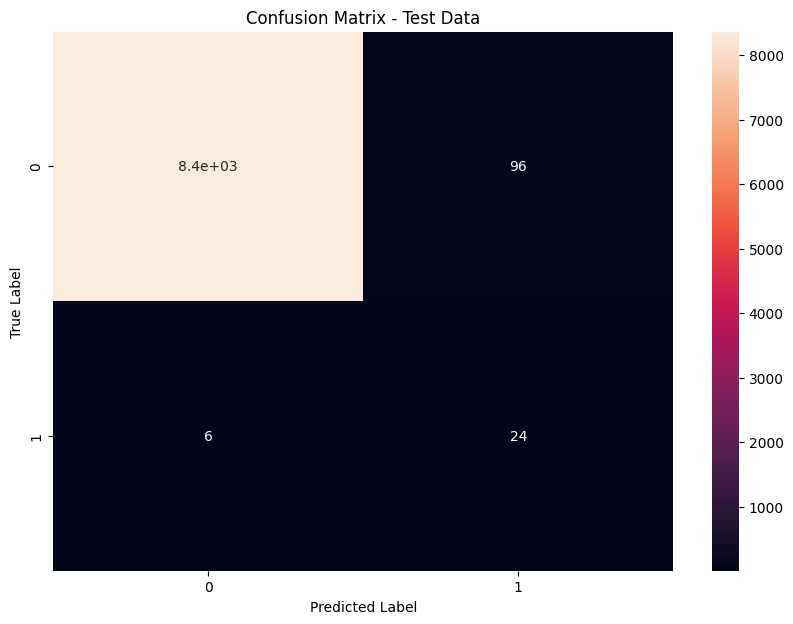

In [ ]:


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



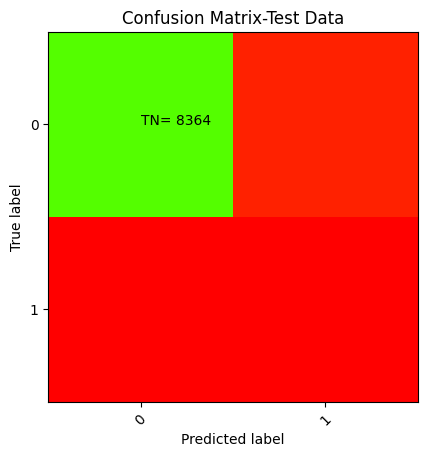

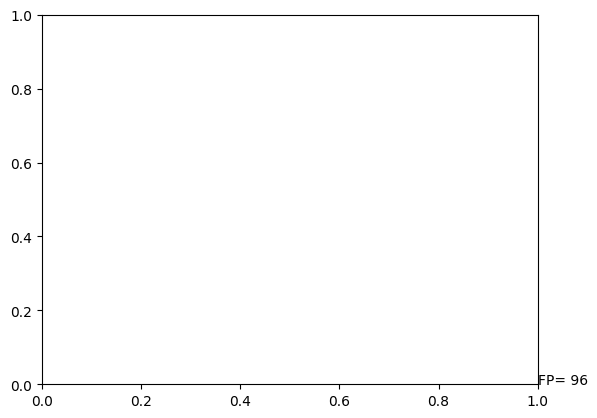

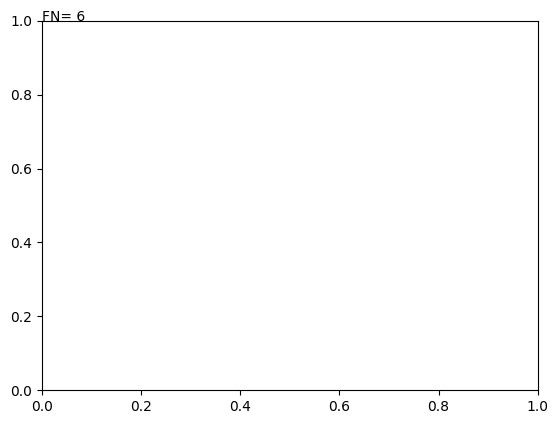

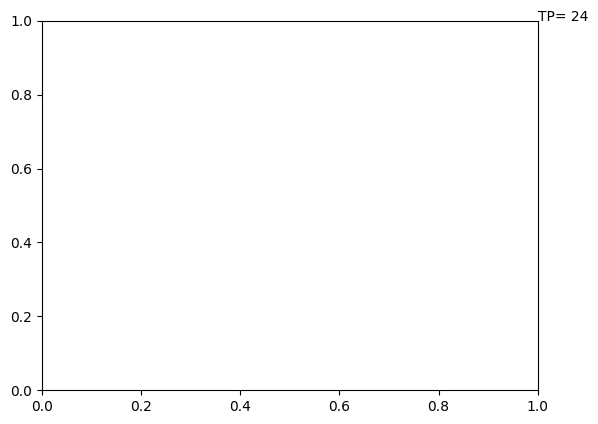

In [ ]:


plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
            plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
            plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8460
         1.0       0.20      0.80      0.32        30

    accuracy                           0.99      8490
   macro avg       0.60      0.89      0.66      8490
weighted avg       1.00      0.99      0.99      8490



In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [ ]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.8


In [ ]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.2


In [ ]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9886524822695035


In [ ]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9879858657243816
